<a href="https://colab.research.google.com/github/AhamedShimak/pytorch/blob/main/computer_vision_cnn_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [3]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets

from tqdm.auto import tqdm

import sklearn
from sklearn.model_selection import train_test_split

###My functions

In [27]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



def accu(y_pred,y_test):
  correct=torch.eq(y_pred.squeeze(),y_test.squeeze()).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});



#traning function #####################################
def train(
    data_loader,
    model,
    loss_func,
    optimizer,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  train_loss=0
  train_loss_track=[]
  train_accuracy=0

  #train mode
  model=model.to(device)
  model.train()

  #training loop
  for batch, (X,y) in tqdm(enumerate(train_dataloader)):
    #device set
    X,y=X.to(device),y.to(device)

    

    #forward propegation
    predict=model(X)
    #loss calcilation
    loss=loss_func(predict,y)
    

    train_loss_track.append(loss.detach().item())

    #clear passed gradients
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    #update new values for weight and bias
    optimizer.step()

    #print(loss,batch)
    train_loss_track.append(loss.detach().item())
    
    train_loss+=loss_func(predict,y)
    train_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  train_loss=loss/len(train_dataloader)
  train_accuracy=train_accuracy/len(train_dataloader)

  print(f"Training loss: {train_loss:.5f} Train_accuracy {train_accuracy:.2f}")

  
#testing function##################################
def test(
    data_loader,
    model,
    loss_func,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  test_loss=0
  test_loss_track=[]
  test_accuracy=0

  #testing loop
  model.eval()

  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(test_dataloader)):
      #device set
      X,y=X.to(device),y.to(device)

      
      #forward propegation
      predict=model(X)
      #loss calcilation
      loss=loss_func(predict,y)
      

      test_loss_track.append(loss.detach().item())

      #print(loss,batch)
      test_loss_track.append(loss.detach().item())
      
      test_loss+=loss_func(predict,y)
      test_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  test_loss=loss/len(test_dataloader)
  test_accuracy=test_accuracy/len(test_dataloader)

  print(f"Testing loss: {test_loss:.5f} Test_accuracy {test_accuracy:.2f}")

#evaluation function ############################  
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}



###GPU

In [5]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

Thu Apr 27 11:26:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [6]:
# create data

train=datasets.FashionMNIST(
    root="Data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test=datasets.FashionMNIST(
    root="Data_test",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)
#weight and bias

  #######to prevent mat multiplication error   .unsqueeze(dim=1)


In [7]:
details(train.data[0])


Shape:  torch.Size([28, 28])
Dimentions:  2
###########
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12, 

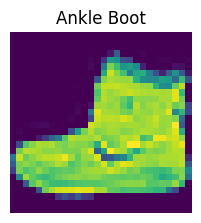

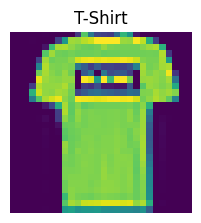

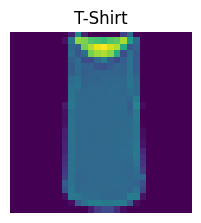

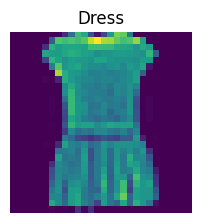

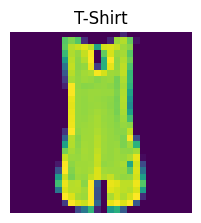

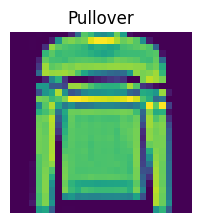

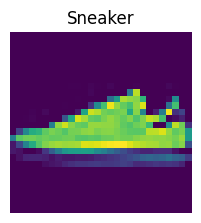

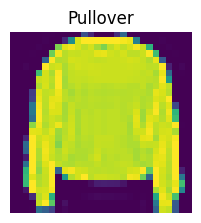

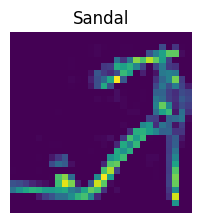

In [8]:
# create train/test split
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
for i in range(9):
  img,label=train[i]
  plt.figure(figsize=(8,8)).add_subplot(3,3,i+1)
  plt.imshow(img.squeeze())
  plt.title(labels_map[label])
  plt.axis("off")
  

In [9]:
#data_loader
torch.manual_seed(23)
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=False)

len(train_dataloader),len(test_dataloader)

(1875, 313)


Shape:  torch.Size([32, 1, 28, 28])
Dimentions:  4
###########
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.0039, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

Text(0.5, 1.0, 'T-Shirt')

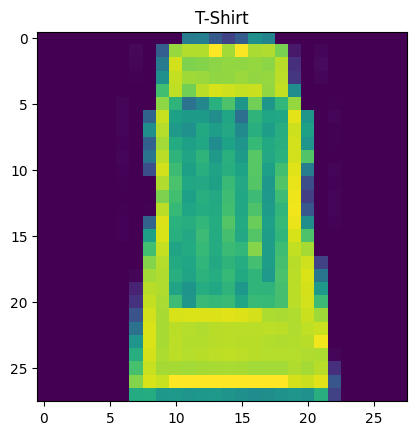

In [10]:
x_train_b_sample,y_train_b_sample=next(iter(train_dataloader))
details(x_train_b_sample),details(y_train_b_sample)

plt.imshow(x_train_b_sample[0].squeeze())
plt.title(labels_map[y_train_b_sample[0].item()])

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [11]:
#flattern layer
details(x_train_b_sample)
flattern=nn.Flatten()
details(flattern(x_train_b_sample))


Shape:  torch.Size([32, 1, 28, 28])
Dimentions:  4
###########
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.0039, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [12]:
#model
class fashion_model_V00(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.ReLU(),
        nn.Linear(in_,512),
        nn.ReLU(),
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,32),
        nn.ReLU(),
        nn.Linear(32,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:


    return self.layer_stack(x)




In [13]:
#model_v01
class fashion_model_V01(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.ReLU(),
        nn.Linear(in_,20),
        nn.ReLU(),
        nn.Linear(20,32),
        nn.ReLU(),
        nn.Linear(32,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [14]:
#model_2
class fashion_model_V02(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_,8),
        nn.ReLU(),
        nn.Linear(8,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:


    return self.layer_stack(x)

In [15]:

#discription of model
model0=fashion_model_V00(in_=784,out_=10).to(device)
model0.state_dict()

OrderedDict([('layer_stack.2.weight',
              tensor([[ 0.0327, -0.0279, -0.0148,  ..., -0.0093, -0.0212, -0.0323],
                      [-0.0024, -0.0251, -0.0211,  ..., -0.0023,  0.0099,  0.0337],
                      [ 0.0229,  0.0179, -0.0215,  ..., -0.0082, -0.0159, -0.0268],
                      ...,
                      [ 0.0354,  0.0158, -0.0315,  ..., -0.0326, -0.0206, -0.0062],
                      [ 0.0103,  0.0027,  0.0176,  ...,  0.0169, -0.0254, -0.0255],
                      [-0.0339, -0.0259, -0.0197,  ...,  0.0048,  0.0248, -0.0190]],
                     device='cuda:0')),
             ('layer_stack.2.bias',
              tensor([-3.2080e-02, -1.4881e-02,  2.7266e-03, -1.0749e-02,  3.0834e-02,
                      -5.5733e-03, -2.5149e-02,  1.2963e-03, -6.0429e-03, -1.0193e-02,
                       1.2059e-02,  7.2520e-04,  1.1637e-02, -8.1061e-03, -4.3406e-03,
                      -3.4619e-02, -2.1797e-02,  9.3406e-03, -3.3195e-02, -1.6057e-02,
      

In [16]:
#discription of model1
model1=fashion_model_V01(in_=784,out_=10).to(device)
model1.state_dict()

OrderedDict([('layer_stack.2.weight',
              tensor([[ 0.0263,  0.0010, -0.0251,  ..., -0.0193, -0.0146,  0.0325],
                      [-0.0214,  0.0063,  0.0278,  ..., -0.0032, -0.0354, -0.0351],
                      [ 0.0150,  0.0024,  0.0174,  ..., -0.0014,  0.0143, -0.0357],
                      ...,
                      [-0.0255, -0.0335,  0.0206,  ...,  0.0202,  0.0229,  0.0124],
                      [-0.0356,  0.0099, -0.0171,  ...,  0.0151,  0.0102, -0.0234],
                      [ 0.0311, -0.0215, -0.0072,  ...,  0.0012,  0.0012, -0.0223]],
                     device='cuda:0')),
             ('layer_stack.2.bias',
              tensor([-0.0256, -0.0013,  0.0245, -0.0344, -0.0003, -0.0111, -0.0233,  0.0215,
                       0.0296,  0.0186,  0.0246, -0.0040,  0.0030, -0.0154, -0.0221,  0.0333,
                       0.0103, -0.0254, -0.0104, -0.0002], device='cuda:0')),
             ('layer_stack.4.weight',
              tensor([[ 0.1698, -0.1046,  0.0160, 

In [17]:
#discription of model1
model2=fashion_model_V02(in_=784,out_=10).to(device)
model2.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0179, -0.0133, -0.0278,  ..., -0.0025,  0.0320,  0.0104],
                      [ 0.0276,  0.0195, -0.0166,  ..., -0.0025, -0.0256, -0.0131],
                      [ 0.0236, -0.0191, -0.0227,  ..., -0.0274,  0.0340, -0.0028],
                      ...,
                      [ 0.0204, -0.0329,  0.0351,  ...,  0.0230,  0.0063, -0.0025],
                      [ 0.0093,  0.0227, -0.0154,  ...,  0.0226,  0.0157, -0.0125],
                      [-0.0327, -0.0313,  0.0202,  ...,  0.0356, -0.0249, -0.0321]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0257, -0.0339,  0.0338,  0.0285,  0.0150, -0.0170,  0.0239,  0.0232],
                     device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.2046,  0.2206,  0.1130,  0.1641,  0.3166, -0.1631, -0.2080,  0.3037],
                      [-0.0549,  0.3182, -0.0169, -0.2635, -0.0012, -0.3491,  0.2691,

##CREATE OPTIMIZER / LOSS_FUNC

In [18]:
#create loss func
loss_func=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.SGD(model0.parameters(),lr=0.1)

##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


Create my own training/testing function

In [21]:
#done

In [28]:
model=model0
for epoch in tqdm(range(15)):
  print("########################################################")
  train(train_dataloader,model,loss_func,optimizer,accu,device)
  test(test_dataloader,model,loss_func,accu,device)
  print("########################################################")



  0%|          | 0/15 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Training loss: 0.00027 Train_accuracy 86.45


0it [00:00, ?it/s]

Testing loss: 0.00051 Test_accuracy 86.28


0it [00:00, ?it/s]

Training loss: 0.00025 Train_accuracy 87.61


0it [00:00, ?it/s]

Testing loss: 0.00079 Test_accuracy 87.42


0it [00:00, ?it/s]

Training loss: 0.00018 Train_accuracy 88.28


0it [00:00, ?it/s]

Testing loss: 0.00055 Test_accuracy 86.68


0it [00:00, ?it/s]

Training loss: 0.00005 Train_accuracy 88.85


0it [00:00, ?it/s]

Testing loss: 0.00056 Test_accuracy 86.64


0it [00:00, ?it/s]

Training loss: 0.00024 Train_accuracy 89.44


0it [00:00, ?it/s]

Testing loss: 0.00026 Test_accuracy 82.83


0it [00:00, ?it/s]

Training loss: 0.00011 Train_accuracy 89.79


0it [00:00, ?it/s]

Testing loss: 0.00056 Test_accuracy 88.26


0it [00:00, ?it/s]

Training loss: 0.00008 Train_accuracy 90.30


0it [00:00, ?it/s]

Testing loss: 0.00032 Test_accuracy 88.44


0it [00:00, ?it/s]

Training loss: 0.00009 Train_accuracy 90.49


0it [00:00, ?it/s]

Testing loss: 0.00036 Test_accuracy 88.40


0it [00:00, ?it/s]

Training loss: 0.00020 Train_accuracy 90.67


0it [00:00, ?it/s]

Testing loss: 0.00019 Test_accuracy 88.18


0it [00:00, ?it/s]

Training loss: 0.00014 Train_accuracy 91.11


0it [00:00, ?it/s]

Testing loss: 0.00045 Test_accuracy 88.53


0it [00:00, ?it/s]

Training loss: 0.00013 Train_accuracy 91.32


0it [00:00, ?it/s]

Testing loss: 0.00017 Test_accuracy 87.60


0it [00:00, ?it/s]

Training loss: 0.00009 Train_accuracy 91.57


0it [00:00, ?it/s]

Testing loss: 0.00037 Test_accuracy 89.15


0it [00:00, ?it/s]

Training loss: 0.00025 Train_accuracy 91.94


0it [00:00, ?it/s]

Testing loss: 0.00017 Test_accuracy 88.31


0it [00:00, ?it/s]

Training loss: 0.00020 Train_accuracy 92.17


0it [00:00, ?it/s]

Testing loss: 0.00007 Test_accuracy 88.00


0it [00:00, ?it/s]

Training loss: 0.00012 Train_accuracy 92.39


0it [00:00, ?it/s]

Testing loss: 0.00017 Test_accuracy 88.72


testing_loop_1

In [ ]:
from tqdm.auto import tqdm
#creating loop using batches
model=model0
epochs=15
train_loss_track=[]
test_loss_track=[]

for epoch in tqdm(range(epochs)):
  train_loss=0
  
  for batch, (x_,y_) in tqdm(enumerate(train_dataloader)):
    x_,y_=x_.to(device),y_.to(device)
    model.train()
    y_pred=model(x_)
    loss=loss_func(y_pred,y_)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   # print(loss,batch)
    train_loss_track.append(loss.detach().item())

  #test
  evaluation=evaluate(model,loss_func,test_dataloader,accu)
  print(evaluation)
  #plt.plot(train_loss_track)
  

In [ ]:
plt.plot(train_loss_track)

In [ ]:
plt.plot(train_loss_track) #V01

testing loop 2

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
train_loss_track=[]
test_loss_track=[]

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X,y=X.to(device),y.to(device)
        model.train() 
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_func(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            plt.plot(train_loss_track)

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    train_loss_track.append(train_loss.detach().item())
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 

    

    test_loss, test_acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X,y=X.to(device),y.to(device)
            # 1. Forward pass
            test_pred = model(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_func(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accu( test_pred.argmax(dim=1),y)
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
        test_loss_track.append(test_loss.detach().item())

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


details_loss_curve(range(epochs),train_loss_track,test_loss_track)

##EVALUATION OF THE MODEL

In [ ]:
evaluate()

In [ ]:
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}

In [ ]:
print(evaluate(model0,loss_func,test_dataloader,accu))
print(evaluate(model1,loss_func,test_dataloader,accu))
print(evaluate(model2,loss_func,test_dataloader,accu))

##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()